In [ ]:
#import necessary packages for wrangling, analysis, and initial visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import matplotlib.image as mpimg
import folium
import plotly.graph_objects as go
import plotly.express as px

from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from geopy.geocoders import Nominatim

from sklearn import metrics
import pickle
from joblib import dump, load

import tensorflow as tf
from tensorflow.keras import Sequential, callbacks
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, Dropout, Activation

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import requests
import io
import os
import datetime

In [2]:
fake1 = pd.read_csv("raw data/fake_news_1.csv")
real1 = pd.read_csv("raw data/real_news_1.csv")
fake2 = pd.read_csv("raw data/fake_news_2.csv")
real2 = pd.read_csv("raw data/real_news_2.csv")

In [3]:
fake1.info() 
real1.info() 
fake2.info()
real2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 


In [4]:
fake1.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
real1.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake2.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [7]:
real2.head()

,Unnamed: 0,Unnamed: 0.1,id,title,publication,author,date,year,month,url,content
0,0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
2,9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...
3,2547,2547,20127,U.S. Plans to Step Up Military Campaign Agains...,New York Times,Michael S. Schmidt and Eric Schmitt,2016-12-21,2016.0,12.0,NaN,"ABU DHABI, United Arab Emirates — The Obama..."
4,2551,2551,20131,272 Slaves Were Sold to Save Georgetown. What ...,New York Times,Rachel L. Swarns,2016-12-15,2016.0,12.0,NaN,WASHINGTON — The human cargo was loaded on ...


In [8]:
#start by working with the first dataset (fake1 real1)
print(real1.isnull().sum(), '\n')
print(fake1.isnull().sum())

title      0
text       0
subject    0
date       0
dtype: int64 

title      0
text       0
subject    0
date       0
dtype: int64


In [9]:
#subject may have limited options, let's check
print(real1.subject.unique())
print(fake1.subject.unique())

['politicsNews' 'worldnews']
['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


Since we are looking at news content, the column that matters most is `text`, so we can remove `title`, `subject`, and `date`. This will clean up our dataset significantly, at least for initial exploration.

In [10]:
real1 = real1.drop(['title', 'subject', 'date'], axis=1)
fake1 = fake1.drop(['title', 'subject', 'date'], axis=1)

In [11]:
real1.head()

,text
0,WASHINGTON (Reuters) - The head of a conservat...
1,WASHINGTON (Reuters) - Transgender people will...
2,WASHINGTON (Reuters) - The special counsel inv...
3,WASHINGTON (Reuters) - Trump campaign adviser ...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [12]:
fake1.head()

,text
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...


In [13]:
#assign hot-encoded values to the text in each dataset with 1 representing fake news
real1['label'] = 0
fake1['label'] = 1

data1 = pd.concat([real1, fake1], axis=0)

In [14]:
data1.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [15]:
data1.shape

(44898, 2)

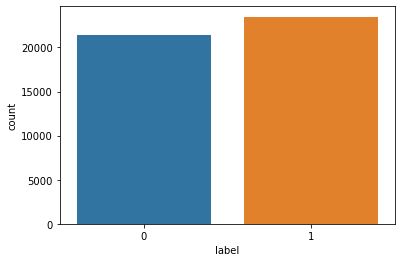

In [16]:
sns.countplot(x='label', data=data1)

In [17]:
data1.label.value_counts()

1    23481
0    21417
Name: label, dtype: int64

In [18]:
for i,x in enumerate(data1['text']):
    if i > 5:
        break
    print(i)
    print(x)
    print('---------')

0
WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educa

In [19]:
#import text processing libraries
import unicodedata, re, string
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import itertools
from textblob import TextBlob
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tuf04\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
#normalize text to remove unnecessary characters and objects
def normalize(data1):
    normalized = []
    for i in data1:
        i = i.lower() #make everything lowercase
        i = re.sub('https?://\S+|www\.\S+', '', i) #get rid of urls
        
        #get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

data1['new_text'] = normalize(data1['text'])

In [21]:
data1.head()

,text,label,new_text
0,WASHINGTON (Reuters) - The head of a conservat...,0,washington reuters the head of a conservative ...
1,WASHINGTON (Reuters) - Transgender people will...,0,washington reuters transgender people will be ...
2,WASHINGTON (Reuters) - The special counsel inv...,0,washington reuters the special counsel investi...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0,washington reuters trump campaign adviser geor...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,seattle washington reuters president donald tr...


In [22]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
    
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

data1['new_text']=data1['new_text'].apply(remove_stopwords)

In [23]:
data1.head()

,text,label,new_text
0,WASHINGTON (Reuters) - The head of a conservat...,0,washington reuters head conservative republica...
1,WASHINGTON (Reuters) - Transgender people will...,0,washington reuters transgender people allowed ...
2,WASHINGTON (Reuters) - The special counsel inv...,0,washington reuters special counsel investigati...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0,washington reuters trump campaign adviser geor...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,seattle washington reuters president donald tr...


In [24]:
for i,x in enumerate(data1['new_text']):
    if i > 5:
        break
    print(i)
    print(x)
    print('---------')

0
washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cuts called fiscal conservative sunday urged budget restraint 2018 keeping sharp pivot way among republicans u representative mark meadows speaking cbs face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even november congressional election campaigns approach republicans seek keep control congress president donald trump republicans want big budget increase military spending democrats also want proportional increases non defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration already willing say going increase non defense discretionary spending 7 percent meadows chairman small influential house freedom caucus said program democrats saying

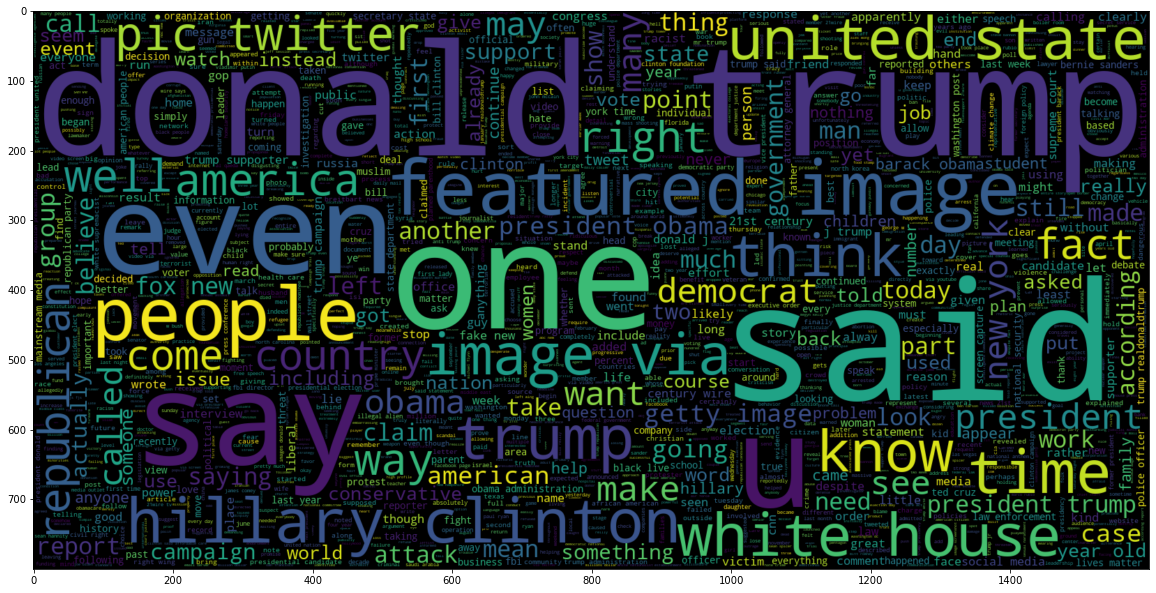

In [25]:
#make a wordcloud of the fake data
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 10000 , width = 1600 , height = 800).generate(" ".join(data1[data1.label == 1].new_text))
plt.imshow(wc, interpolation = 'bilinear')

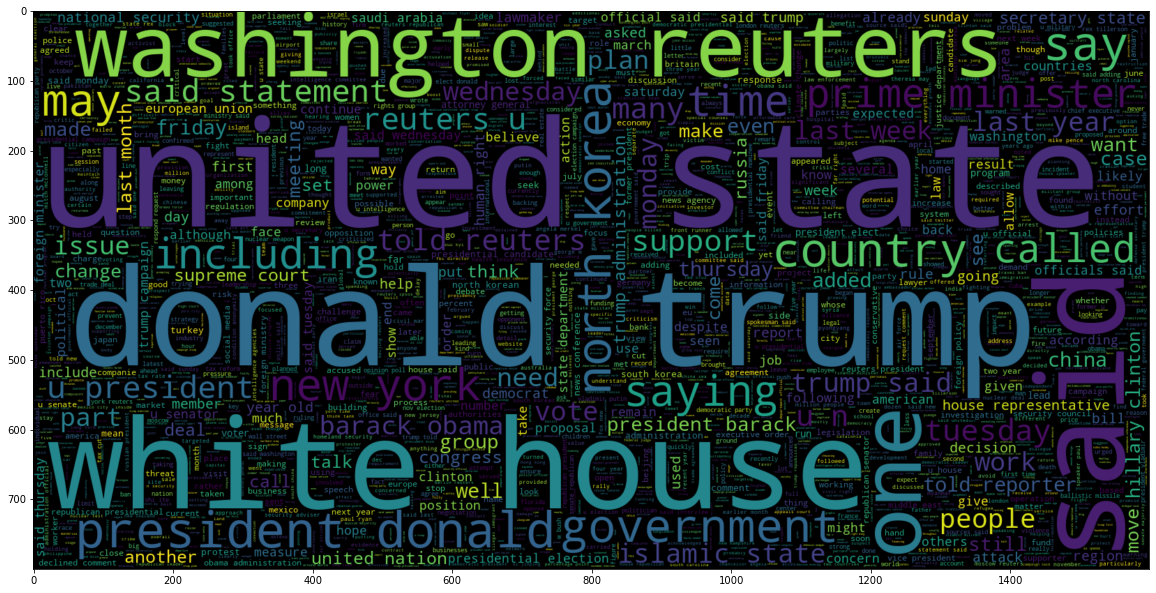

In [26]:
#real data wordcloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 10000 , width = 1600 , height = 800).generate(" ".join(data1[data1.label == 0].new_text))
plt.imshow(wc , interpolation = 'bilinear')

Since our text data has been pre-processed, we can now build our machine learning models using NLP techniques. Namely, we will be building a Bag of Words, followed by vectorizing the text, and finally applying it to a TF-IDF algorithm. This will allow our train and test sets to be used for machine learning.

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [28]:
#Creating the bag of words
bow_article = CountVectorizer().fit(data1['new_text'])
article_vect = bow_article.transform(data1['new_text'])

#TF-IDF
tfidf_transformer = TfidfTransformer().fit(article_vect)
news_tfidf = tfidf_transformer.transform(article_vect)

print(news_tfidf.shape)

(44898, 118095)


In [31]:
features = news_tfidf
targets = data1['label']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)

Now that our train/test split is done, we can begin ML modeling. Our data is not continuous (since we are looking for news to either be fake or real, '0' or '1'), so we should avoid certain models like Random Forest Regression and Linear Regression.

Instead, we can try classification based models such as Multinomial Bayes, Naive Bayes, Decision Tree, and kNN. We can also try Random Forest Classifier, Logistic Regression,

First, we can try Multinomial Naive Bayes.

In [39]:
%%time
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

mnb_score = mnb.score(X_test, y_test)
mnb_predict = mnb.predict(X_test)

print('Multinomial Bayes R2:', mnb_score)
print('\n')

print("=== Classification Report ===")
print(classification_report(y_true=y_test, y_pred=mnb_predict))
print('\n')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_true=y_test, y_pred=mnb_predict))

Multinomial Bayes R2: 0.9374164810690423


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4258
           1       0.93      0.95      0.94      4722

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



=== Confusion Matrix ===
[[3935  323]
 [ 239 4483]]
Wall time: 491 ms


Our results are quite promising (R2 of 0.937), but we can still see if any models perform better.

Now we can try Decision Tree Classifier.

In [40]:
%%time
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)

dtc_predict = dtc.predict(X_test)
dtc_score = dtc.score(X_test, y_test)

print('Decision Tree R2:', dtc_score)
print('\n')

print("=== Classification Report ===")
print(classification_report(y_true=y_test, y_pred=dtc_predict))
print('\n')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_true=y_test, y_pred=dtc_predict))

Decision Tree R2: 0.9964365256124722


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4258
           1       1.00      1.00      1.00      4722

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



=== Confusion Matrix ===
[[4243   15]
 [  17 4705]]
Wall time: 1min 4s


Next, we can try kNN classifier.

In [41]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(3)
knc.fit(X_train, y_train)

knc_predict = knc.predict(X_test)
knc_score = knc.score(X_test, y_test)

print('kNN R2:', knc_score)
print('\n')

print("=== Classification Report ===")
print(classification_report(y_true=y_test, y_pred=knc_predict))
print('\n')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_true=y_test, y_pred=knc_predict))

kNN R2: 0.6740534521158129


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.33      0.49      4258
           1       0.62      0.98      0.76      4722

    accuracy                           0.67      8980
   macro avg       0.78      0.66      0.63      8980
weighted avg       0.77      0.67      0.63      8980



=== Confusion Matrix ===
[[1418 2840]
 [  87 4635]]
Wall time: 2min 40s


Let us try Gradient Boosting and XGB to see if results improve at all.

In [43]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

gbc_predict = gbc_model.predict(X_test)
gbc_score = gbc_model.score(X_test, y_test)

print('GBC R2:', gbc_score)
print('\n')

print("=== Classification Report ===")
print(classification_report(y_true=y_test, y_pred=gbc_predict))
print('\n')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_true=y_test, y_pred=gbc_predict))

GBC R2: 0.9956570155902005


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4258
           1       1.00      0.99      1.00      4722

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



=== Confusion Matrix ===
[[4248   10]
 [  29 4693]]
Wall time: 39min 18s


In [48]:
%%time
import xgboost as xgb
from xgboost.sklearn import  XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train, y_train)

xgb_predict = xgb_model.predict(X_test)
xgb_score = xgb_model.score(X_test, y_test)

print('The XGBoost r2 testing is:', xgb_score)

print("=== Classification Report ===")
print(classification_report(y_true=y_test, y_pred=xgb_predict))
print('\n')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_true=y_test, y_pred=xgb_predict))

[15:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The XGBoost r2 testing is: 0.9976614699331848
=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4258
           1       1.00      1.00      1.00      4722

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



=== Confusion Matrix ===
[[4250    8]
 [  13 4709]]
Wall time: 2min 8s


It is clear that we are getting near 100% accuracy and a very strong model with the XGBoost model. This tells us that, to a very high degree of accuracy, we can predict based on the text content of a news article whether it is real or fake. We can deploy this model and implement it across other datasets for validation and verification.

In [36]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

In [37]:
#initiate the tokenizer
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [38]:
#tokenize the text into vectors 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [41]:
#Build RNN model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                18560     
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 390,401
Trainable params: 390,401
Non-trainable params: 0
__________________________________________________

In [42]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [43]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10
1078/1078 [==============================] - 292s 265ms/step - loss: 0.4327 - accuracy: 0.7112 - val_loss: 0.0362 - val_accuracy: 0.9900
Epoch 2/10
1078/1078 [==============================] - 294s 273ms/step - loss: 0.0400 - accuracy: 0.9920 - val_loss: 0.0294 - val_accuracy: 0.9911
Epoch 3/10
1078/1078 [==============================] - 306s 284ms/step - loss: 0.0195 - accuracy: 0.9961 - val_loss: 0.0189 - val_accuracy: 0.9944
Epoch 4/10
1078/1078 [==============================] - 296s 275ms/step - loss: 0.0156 - accuracy: 0.9971 - val_loss: 0.0187 - val_accuracy: 0.9955
Epoch 5/10
1078/1078 [==============================] - 295s 273ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0216 - val_accuracy: 0.9964
Epoch 6/10
1078/1078 [==============================] - 295s 273ms/step - loss: 0.0064 - accuracy: 0.9985 - val_loss: 0.0240 - val_accuracy: 0.9939


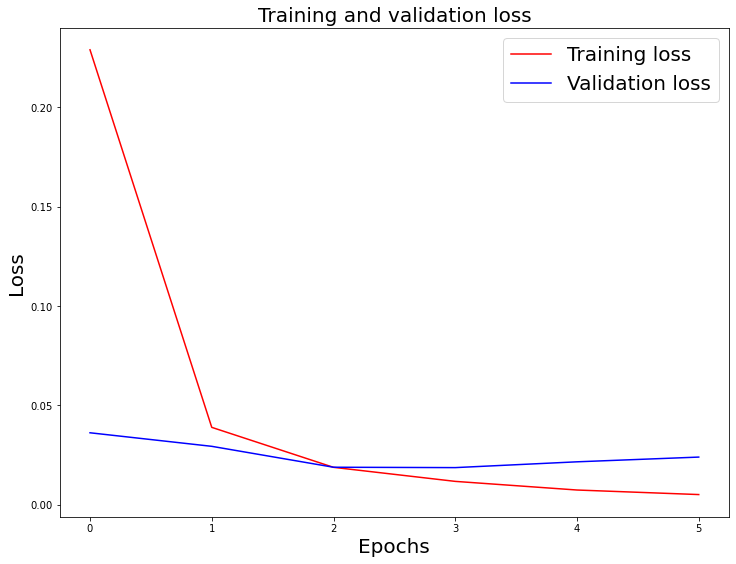

In [44]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

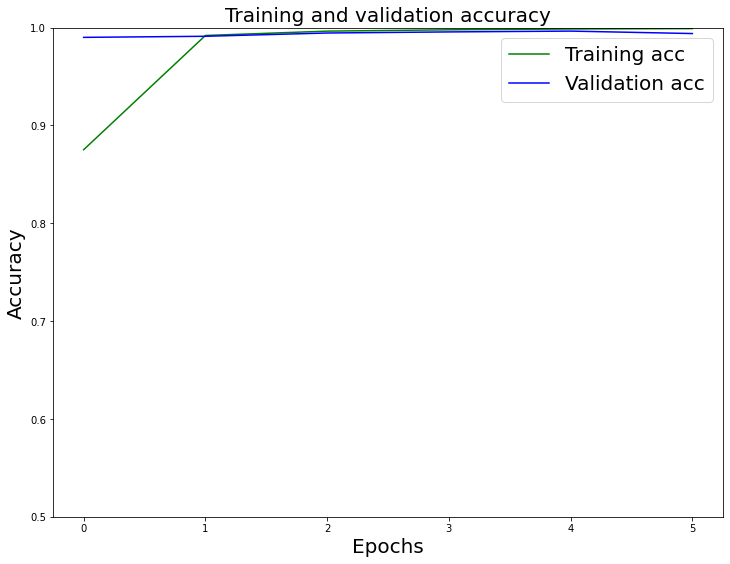

In [45]:
plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()